### Imports

In [ ]:
import pandas as pd

### Data exploration

##### Data used to analyze bird location patterns are not available due to copyright restrictions.

In [62]:
# Number of rows
len(df)

9673199

In [4]:
# Column names
df.columns

Index(['id', 'uuid', 'turbine', 'size_category', 'x', 'y', 'z', 'time',
       'timestamp', 'lat', 'lng', 'alt', 'distance', 'distance_absolute'],
      dtype='object')

In [4]:
# Display first few rows
df.head(20)

,uuid,x,y,z,time
0,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,128,99,28,2023-03-03 07:35:56.738
1,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,126,99,28,2023-03-03 07:35:57.019
2,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,126,99,28,2023-03-03 07:35:57.058
3,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,126,99,28,2023-03-03 07:35:57.089
4,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,122,100,28,2023-03-03 07:35:57.394
5,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,120,100,28,2023-03-03 07:35:57.683
6,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,119,100,28,2023-03-03 07:35:57.769
7,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,119,100,28,2023-03-03 07:35:57.807
8,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,116,101,28,2023-03-03 07:35:58.057
9,29f7ed67-b42c-4bfe-9755-bcb89ba48e7b,116,101,28,2023-03-03 07:35:58.112


In [6]:
# Check column data types
df.dtypes

id                            int64
uuid                         object
turbine                      object
size_category                object
x                             int64
y                             int64
z                             int64
time                 datetime64[ns]
timestamp                     int64
lat                         float64
lng                         float64
alt                           int64
distance                      int64
distance_absolute             int64
dtype: object

In [7]:
# Check for missing values
df.isna().sum()

id                   0
uuid                 0
turbine              0
size_category        0
x                    0
y                    0
z                    0
time                 0
timestamp            0
lat                  0
lng                  0
alt                  0
distance             0
distance_absolute    0
dtype: int64

In [8]:
# Check for duplicates
df.duplicated().sum()

0

In [9]:
# How many size_categories there are
df['size_category'].value_counts()

medium    5769844
xlarge    1611418
small     1202034
usmall     757010
large      332893
Name: size_category, dtype: int64

In [ ]:
# How many distinct observations for each uuid are there
df['uuid'].value_counts()

06b40806-8061-4af7-a551-69b3ec196f0c    80571
fe09fe80-adca-48ca-8b1d-bd0d6478ea3d    54638
fa9e4f2b-7f41-429c-9804-782e7f43a254    52583
9a624ce6-0690-4f93-a2eb-741b8b9d48d5    51839
b04cd8c2-299d-455d-8588-a15f3e38d5ab    47153
                                        ...  
b86d8052-8124-4b3b-a470-c8f0a961cdaf       10
0442c749-e2d8-45e7-8ebe-afba64ef5fd2       10
3c8b9ff9-4eda-4d02-ad29-1296bfe640ca       10
f9e7573e-81e1-4713-96c5-2d0cc53661fa       10
6f086967-0ed5-4aeb-91dc-135df94f690b       10
Name: uuid, Length: 17760, dtype: int64

<AxesSubplot:ylabel='Frequency'>

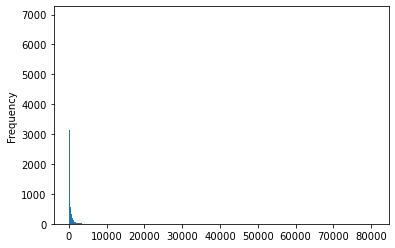

In [65]:
# Check distribution of # of observations
df['uuid'].value_counts().plot.hist(bins = 1000)

In [ ]:
# Check largest uuid
df_largest = df[df['uuid'] == '06b40806-8061-4af7-a551-69b3ec196f0c']
df_largest.head(20)

In [4]:
# Does 80000 observations of a single bird make sense?...
df['uuid'].value_counts().quantile(q = 0.9)

# 90% ob observations contain less than 1043 points. Let's get rid of observations of more than 1000 points
df['count'] = df.groupby('uuid')['uuid'].transform('count')
df = df[df['count'] < 1000].copy()

In [5]:
# See how many observations we got
print(f"Num of observations: {len(df['uuid'].value_counts())}")
# See how many rows are left
print(f"Number of rows: {len(df)}")

Num of observations: 15904
Number of rows: 3242155


In [5]:
# Map uuid entries to indices

# Get all uuid names
uuid = df['uuid'].value_counts()
# See how many uuid values there are
num_of_entries = len(uuid)

# Create dictionary mapping names in uuid to n
rename_dict = {name:idx for idx, name in enumerate(list(uuid.index))}

# Apply mapping
df['uuid'] = df['uuid'].apply(lambda x: rename_dict[x])
# df['uuid'].head()

# Sort df entries by uuid and time
df = df.sort_values(by = ['uuid', 'time'])
df.head()

,uuid,x,y,z,time
8731450,0,-246,94,121,2023-03-11 17:33:10.452
8731459,0,-246,94,121,2023-03-11 17:33:10.521
8731470,0,-246,94,121,2023-03-11 17:33:10.572
8731478,0,-249,96,122,2023-03-11 17:33:10.638
8731488,0,-248,95,121,2023-03-11 17:33:10.740


In [8]:
df.tail(20)

,uuid,x,y,z,time,count
8960469,15902,-160,-91,28,2023-03-12 06:53:44.724,10
8960470,15902,-160,-91,28,2023-03-12 06:53:44.825,10
8960471,15902,-160,-91,28,2023-03-12 06:53:44.880,10
8960473,15902,-160,-91,28,2023-03-12 06:53:45.044,10
8960481,15902,-159,-91,28,2023-03-12 06:53:45.505,10
8960487,15902,-159,-92,29,2023-03-12 06:53:45.793,10
8960492,15902,-158,-92,29,2023-03-12 06:53:46.200,10
8960511,15902,-156,-94,32,2023-03-12 06:53:47.575,10
8960513,15902,-156,-94,32,2023-03-12 06:53:47.630,10
8960519,15902,-156,-95,32,2023-03-12 06:53:48.199,10


In [6]:
# Normalize time within each flight
df['time'] = df.groupby('uuid')['time'].transform(lambda x: x - x.min())
# Convert to seconds
df['time'] = df['time'].dt.total_seconds()

In [7]:
# Calculate speed of each bird to identify supersonic birds

# Calculate position increments
delta_x = df.groupby('uuid')['x'].transform(lambda x: x - x.shift(1))
delta_y = df.groupby('uuid')['y'].transform(lambda x: x - x.shift(1))
delta_z = df.groupby('uuid')['z'].transform(lambda x: x - x.shift(1))
# Calculate distance travelled
distance = (delta_x**2 + delta_y**2 + delta_z**2)**(1/2)
# Calculate speed
df['speed'] = distance/df['time']

In [ ]:
# Check distribution of speeds
df['speed'].plot.hist(bins = 100)

In [ ]:
# Quite a few super-sonic birds... Nice!!!
df[df['speed'] > 100]['speed'].plot.hist(bins=100)

According to `ChatGPT`: The average speed of an ordinary bird can vary depending on factors such as species, size, and environmental conditions. However, as a rough estimate, many small to medium-sized birds can fly at speeds ranging from 20 to 50 kilometers per hour (**approximately 5.5 to 13.9 meters per second**). So, we can say the average speed of an ordinary bird is approximately 10 to 13 meters per second.

In [ ]:
# Filter only ordinary birds

# Set max speed
MAX_SPEED = 20
# Get only ordinary birds
df_no_supersonic_birds = df[df['speed'] < MAX_SPEED]

# See how many rows were dropped
print(f"Before dropping supersonic birds: {len(df)}, after dropping: {len(df_no_supersonic_birds)}")